### **Parte 1: SQL**

1. **Conexión y Exploración Inicial:**
    - Conecta a una base de datos SQL (puede ser PostgreSQL, MySQL, SQLite, etc.) e importa el dataset.
    - Explora la estructura del dataset. Proporciona una descripción de la tabla y las columnas disponibles.

In [3]:
import sqlite3
import pandas as pd

In [4]:
conn = sqlite3.connect('Netflix.db')

In [5]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1', usecols=lambda column: column not in ["", "Unnamed"])
df_cleaned = df.drop(columns=[col for col in df.columns if col.startswith('Unnamed')])


df_cleaned.to_sql('Netflix', conn, if_exists='replace', index=False)
cursor = conn.cursor()

In [6]:

cursor.execute("PRAGMA table_info(Netflix);")

columns_info = cursor.fetchall()

print("Column Name | Data Type | Not Null | Default Value | Primary Key")
for column in columns_info:
    print(f"{column[1]} | {column[2]} | {column[3]} | {column[4]} | {column[5]}")


Column Name | Data Type | Not Null | Default Value | Primary Key
show_id | TEXT | 0 | None | 0
type | TEXT | 0 | None | 0
title | TEXT | 0 | None | 0
director | TEXT | 0 | None | 0
cast | TEXT | 0 | None | 0
country | TEXT | 0 | None | 0
date_added | TEXT | 0 | None | 0
release_year | INTEGER | 0 | None | 0
rating | TEXT | 0 | None | 0
duration | TEXT | 0 | None | 0
listed_in | TEXT | 0 | None | 0
description | TEXT | 0 | None | 0


### 2. **Consultas Específicas:**
### Top 10 países con más títulos en Netflix:

In [7]:
query = """
SELECT country as pais, COUNT(*) as title_count
FROM netflix
where
country is not null
GROUP BY country
ORDER BY title_count DESC
LIMIT 10;
"""

# Ejecutar la consulta
cursor.execute(query)
top_pais = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
df_top_pais = pd.DataFrame(top_pais, columns=column_names)

In [8]:
df_top_pais

,pais,title_count
0,United States,2819
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,200
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


### Géneros más populares:

In [9]:
query = """
SELECT listed_in  as Genero, COUNT(*) as title_count
FROM netflix
where
country is not null
GROUP BY country
ORDER BY title_count DESC;
"""

# Ejecutar la consulta
cursor.execute(query)
generos_populares = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
generos_populares = pd.DataFrame(generos_populares, columns=column_names)

In [10]:
generos_populares

,Genero,title_count
0,Documentaries,2819
1,"International TV Shows, Romantic TV Shows, TV ...",972
2,"British TV Shows, Reality TV",419
3,"Action & Adventure, Anime Features, Internatio...",245
4,"Kids' TV, Korean TV Shows",200
...,...,...
743,"Dramas, Independent Movies, International Movies",1
744,"Comedies, International Movies, Sports Movies",1
745,"Dramas, International Movies, Thrillers",1
746,"International TV Shows, TV Dramas",1


### Cantidad de títulos lanzados por año:

In [11]:
query = """
SELECT release_year  as Anio, COUNT(*) as title_count
FROM netflix
where
country is not null
GROUP BY country
ORDER BY title_count DESC;
"""

# Ejecutar la consulta
cursor.execute(query)
titulos_anio = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
titulos_anio = pd.DataFrame(titulos_anio, columns=column_names)

In [12]:
titulos_anio

,Anio,title_count
0,2020,2819
1,2021,972
2,2021,419
3,2002,245
4,2016,200
...,...,...
743,2017,1
744,2015,1
745,2017,1
746,2021,1


### **Parte 2: Visualización con Looker Studio/Tableau**

1. **Dashboards:**
    - Crea un dashboard interactivo que incluya:
        - Distribución de títulos por país.
        - Géneros más populares.
        - Evolución de la cantidad de títulos lanzados por año.
    - Instrucciones:
        - Importa los datos en Looker Studio/Tableau.
        - Diseña gráficos que sean intuitivos y útiles para el análisis.

https://lookerstudio.google.com/reporting/cceedbe5-4d10-4c0e-9877-abdebba818c1/page/Uum7D

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px


### Leyendo y limpiando la data

In [14]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

### Borro las columnas vacias  del dataframe


In [16]:
df = df.drop(columns=[
    'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
    'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
    'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
    'Unnamed: 24', 'Unnamed: 25'
])

### Reemplazo las , por espacio en los los campos

In [17]:
df = df.replace(',', ' ', regex=True)

In [18]:
df = df.replace(',', ' ', regex=True)

### Saltos de Lineas

In [19]:
def clean_text(text):
    if isinstance(text, str):
        return text.replace('\n', ' ').replace('\r', ' ')
    return text

df = df.applymap(clean_text)

C:\Users\emiliano.jauma\AppData\Local\Temp\ipykernel_51604\1035074061.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_text)


In [20]:
df.to_csv('netflix_titles_clean.csv',encoding='utf-8', index=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [22]:
df.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [23]:
df.describe(exclude='number').T

,count,unique,top,freq
show_id,8809,8809,s1,1
type,8809,2,Movie,6132
title,8809,8806,22-Jul,2
director,6175,4529,Rajiv Chilaka,19
cast,7984,7694,David Attenborough,19
country,7978,748,United States,2819
date_added,8799,1768,January 1 2020,109
rating,8805,18,TV-MA,3208
duration,8806,220,1 Season,1794
listed_in,8809,516,Dramas International Movies,362


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8809.0,2014.181292,8.818932,1925.0,2013.0,2017.0,2019.0,2024.0


In [25]:
df.show_id.duplicated().sum()

0

In [26]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.901237
cast             9.365422
country          9.433534
date_added       0.113520
release_year     0.000000
rating           0.045408
duration         0.034056
listed_in        0.000000
description      0.000000
dtype: float64

### Replazo de valores nulos 

In [27]:
df['director'] = df['director'].fillna('Sin dato')
df['cast'] = df['cast'].fillna('Sin dato')
df['country'] = df['country'].fillna('Sin dato')
df['date_added'] = df['date_added'].fillna('Sin dato')
df['rating'] = df['rating'].fillna('Sin dato')
df['duration'] = df['duration'].fillna('Sin dato')
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Porcentaje  por tipo 

In [28]:
q_type=df.groupby('type')['show_id'].count()
porcentaje_type = (q_type / q_type.sum()) * 100
porcentaje_type   

type
Movie      69.610625
TV Show    30.389375
Name: show_id, dtype: float64

### Top 10 

In [29]:

pais_cantidad = df["country"].value_counts()

pais_cantidad_df = pd.DataFrame(pais_cantidad).reset_index()

pais_cantidad_df.columns = ["country", "count"]

fig = px.bar(pais_cantidad_df.head(10), 
             x="country", 
             y="count", 
             title="Top 10 por País", 
             text="count", 
             color_discrete_sequence=["#2B2D42"]) 

fig.update_traces(textposition="outside")

fig.update_layout(
    width=800,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig.show()


In [30]:

# Filtrar los datos para películas y series
df_peliculas = df[df["type"] == "Movie"]
df_series = df[df["type"] == "TV Show"]

# Contar la cantidad de películas por país
country_counts_peliculas = df_peliculas["country"].value_counts()
country_counts_series = df_series["country"].value_counts()

# Convertir a DataFrame y resetear el índice
country_df_peliculas = pd.DataFrame(country_counts_peliculas).reset_index()
country_df_series = pd.DataFrame(country_counts_series).reset_index()

# Renombrar las columnas
country_df_peliculas.columns = ["country", "count"]
country_df_series.columns = ["country", "count"]

# Crear gráficos de barras para el top 10 de películas y series
fig_peliculas = px.bar(country_df_peliculas.head(10), 
                      x="country", 
                      y="count", 
                      title="Top 10 Películas por País", 
                      text="count", 
                      color_discrete_sequence=["#586BA4"]) 

fig_series = px.bar(country_df_series.head(10), 
                   x="country", 
                   y="count", 
                   title="Top 10 Series por País", 
                   text="count", 
                   color_discrete_sequence=["#31754F"])

# Actualizar la posición del texto fuera de las barras
fig_peliculas.update_traces(textposition="outside")
fig_series.update_traces(textposition="outside")

# Ajustar el tamaño de los gráficos
fig_peliculas.update_layout(
    width=800,  # Ancho en píxeles
    height=500  # Alto en píxeles
)

fig_series.update_layout(
    width=800,  # Ancho en píxeles
    height=500  # Alto en píxeles
)

# Mostrar los gráficos
fig_peliculas.show()
fig_series.show()


### Top 10  Genero Peliculas

In [31]:

df_agrup_tipo_listed = df.groupby(['type', 'listed_in']).size().reset_index(name='count')

df_filtro_serie = df_agrup_tipo_listed[df_agrup_tipo_listed['type'] == 'TV Show'][['listed_in', 'count']]

df_filtro_peliculas = df_agrup_tipo_listed[df_agrup_tipo_listed['type'] == 'Movie'][['listed_in', 'count']]

df_filtro_series_top10 = df_filtro_serie.sort_values(by='count', ascending=False).head(10)
df_filtro_peliculas_top10 = df_filtro_peliculas.sort_values(by='count', ascending=False).head(10)

In [32]:
df_filtro_peliculas_top10

,listed_in,count
218,Dramas International Movies,362
183,Documentaries,359
277,Stand-Up Comedy,334
142,Comedies Dramas International Movies,274
211,Dramas Independent Movies International Movies,252
75,Children & Family Movies,215
79,Children & Family Movies Comedies,201
190,Documentaries International Movies,186
221,Dramas International Movies Romantic Movies,180
159,Comedies International Movies,176


### Top 10  Genero de Series

In [33]:
df_filtro_series_top10

,listed_in,count
434,Kids' TV,220
424,International TV Shows TV Dramas,121
347,Crime TV Shows International TV Shows TV Dramas,110
445,Kids' TV TV Comedies,99
453,Reality TV,95
405,International TV Shows Romantic TV Shows TV ...,94
406,International TV Shows Romantic TV Shows TV ...,90
284,Anime Series International TV Shows,88
370,Docuseries,85
490,TV Comedies,69


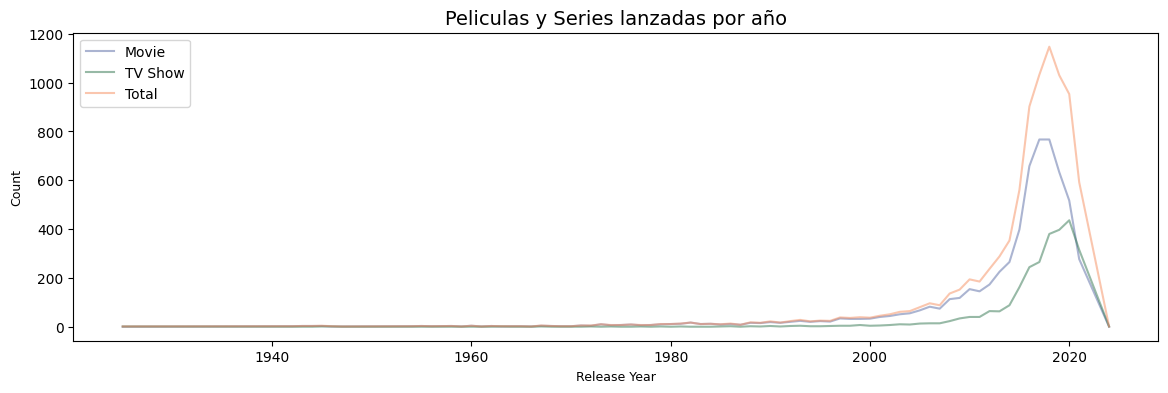

In [34]:
content_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_type['Total'] = content_type['Movie'] + content_type['TV Show']
content_type = content_type.reset_index()

plt.figure(figsize=(14,4))
plt.title('Peliculas y Series lanzadas por año', fontsize=14)
plt.plot(content_type['release_year'], content_type['Movie'], label='Movie', color='#586BA4', alpha=0.5)
plt.plot(content_type['release_year'], content_type['TV Show'], label='TV Show', color='#31754F', alpha=0.5)
plt.plot(content_type['release_year'], content_type['Total'], label='Total', color='#F68E5F', alpha=0.5)
plt.xlabel('Release Year', fontsize=9)
plt.ylabel('Count', fontsize=9)
plt.legend(loc='upper left')

### Parte 3: Análisis Avanzado con Python/R
1 1. **Análisis de Duración:**
    - Determina la distribución de la duración de los títulos (películas y series). Utiliza histogramas y box plots para visualizar la distribución.

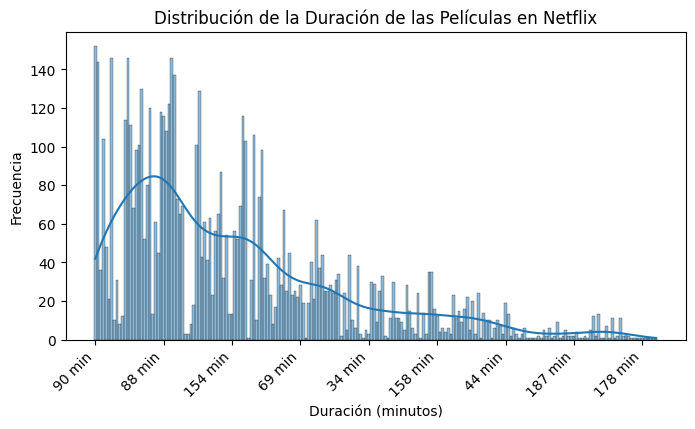

c:\Users\emiliano.jauma\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



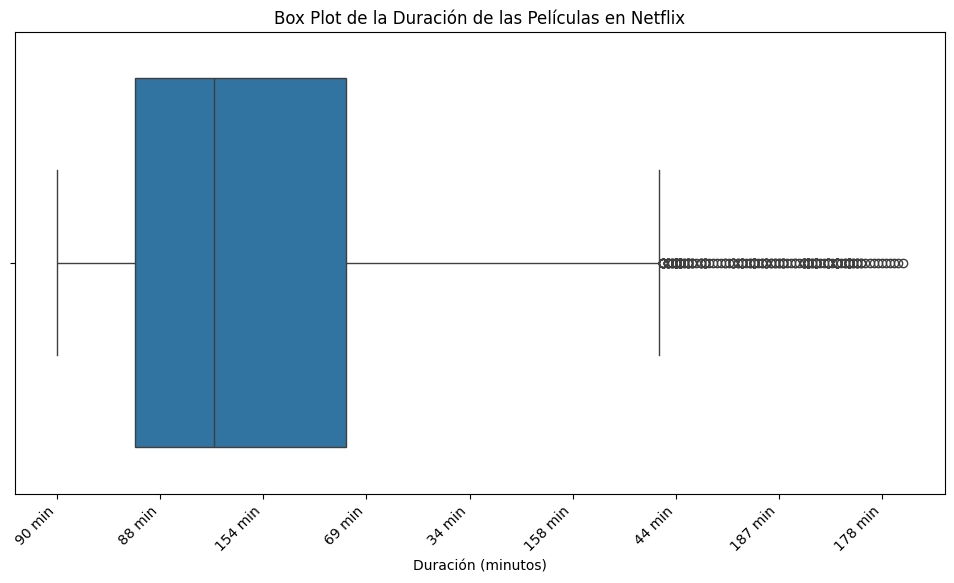

In [35]:

# Histograma de la duración de las películas
plt.figure(figsize=(8, 4))
sns.histplot(df_peliculas['duration'], bins=30, kde=True)
plt.title('Distribución de la Duración de las Películas en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')


plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados y alinea a la derecha

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Limita a 10 etiquetas en el eje X

plt.show()
# Box plot de la duración de las películas
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_peliculas['duration'])
plt.title('Box Plot de la Duración de las Películas en Netflix')
plt.xlabel('Duración (minutos)')

plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados y alinea a la derecha

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Limita a 10 etiquetas en el eje X

plt.show()


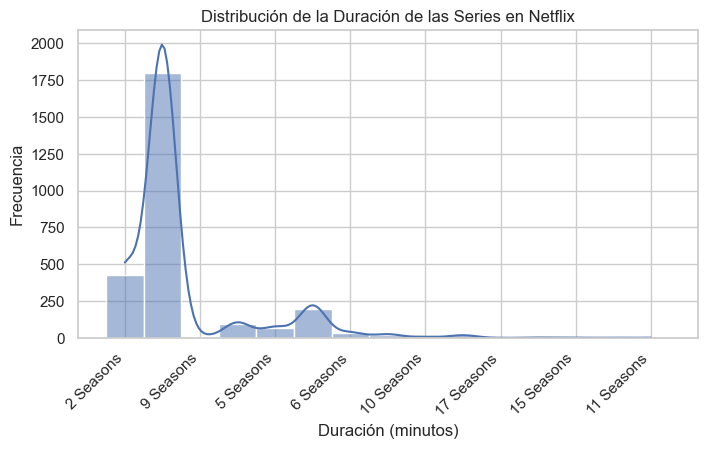

In [40]:

# Histograma de la duración de las películas
plt.figure(figsize=(8, 4))
sns.histplot(df_series['duration'], bins=30, kde=True)
plt.title('Distribución de la Duración de las Series en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')


plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados y alinea a la derecha

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Limita a 10 etiquetas en el eje X

plt.show()



### 2. **Análisis de Tendencias:**
    - Identifica tendencias en el tiempo, como el incremento o decremento de títulos en función del año.

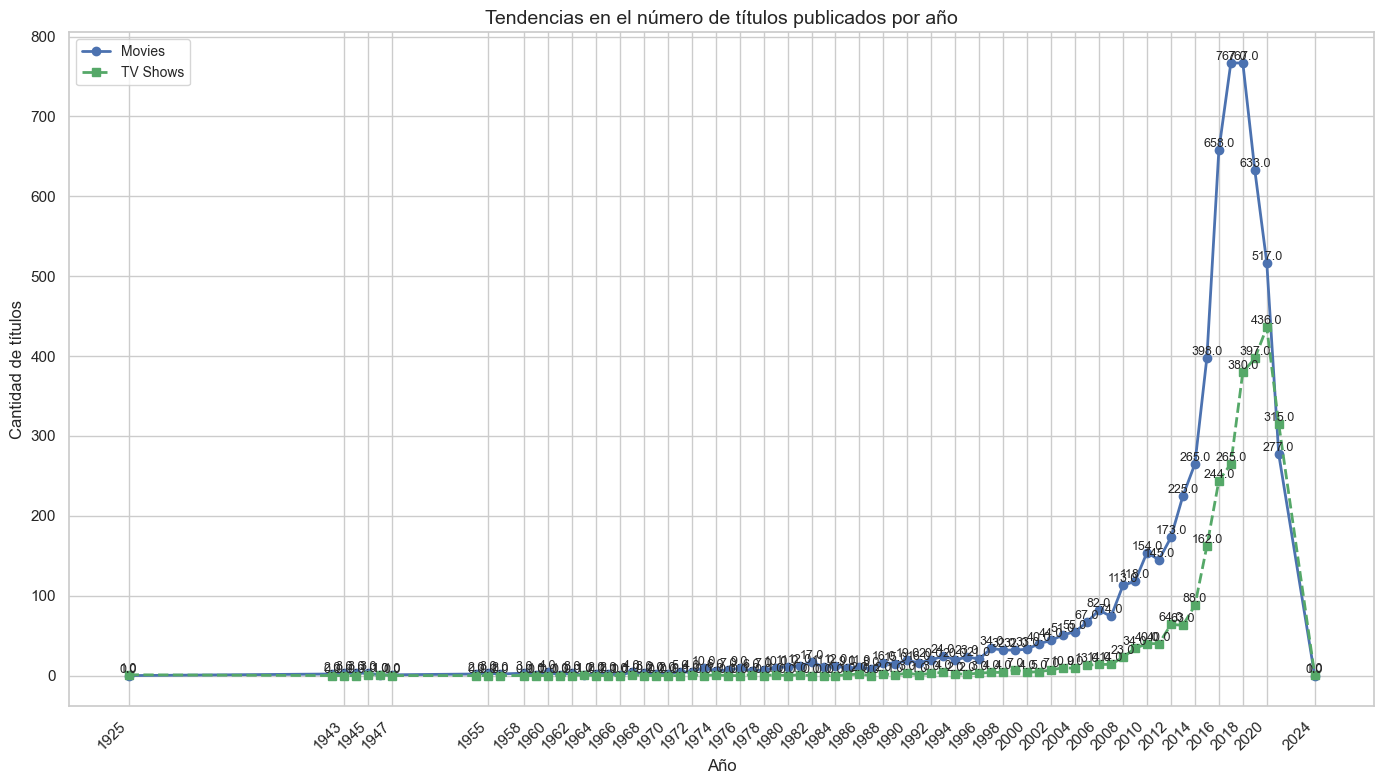

In [50]:
trend_data = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
trend_data.reset_index(inplace=True)
trend_data.rename(columns={'Movie': 'Movies', 'TV Show': 'TV Shows'}, inplace=True)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))  # Tamaño más adecuado para una visualización clara
plt.plot(trend_data['release_year'], trend_data['Movies'], 
         label='Movies', color='b', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(trend_data['release_year'], trend_data['TV Shows'], 
         label='TV Shows', color='g', marker='s', linestyle='--', linewidth=2, markersize=6)
for i, row in trend_data.iterrows():
    plt.text(row['release_year'], row['Movies'], row['Movies'], fontsize=9, ha='center', va='bottom')
    plt.text(row['release_year'], row['TV Shows'], row['TV Shows'], fontsize=9, ha='center', va='bottom')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de títulos', fontsize=12)
plt.title('Tendencias en el número de títulos publicados por año', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

plt.xticks(ticks=trend_data['release_year'][::2], rotation=45, ha='right')

plt.tight_layout()

plt.show()


